In [1]:
import pandas as pd
import numpy as np

# PLOTTING
import matplotlib.pyplot as plt
#set a global label font size for all plots
plt.rc('font', size=10)
plot_colours = ['lightgreen', 'mediumturquoise', 'deepskyblue', 'cornflowerblue','mediumpurple','mediumorchid','mediumvioletred']
# seaborn and global settings
import seaborn as sns
sns.axes_style("white")
# set global pallette
sns.set_palette(sns.color_palette(plot_colours))
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# MODELS 
from sklearn.cluster import KMeans, k_means

# PREPROCESSING
from sklearn.preprocessing import scale ,StandardScaler
from sklearn.preprocessing import LabelEncoder

# POST PROCESSING
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# METRICS
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
dummies_df = pd.read_csv('final_dummies_df.csv')
original_df = pd.read_csv('final_original_df.csv')

In [4]:
dummies_df.head()

,Unnamed: 0,ID,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Spending_Score_Average,...,Work_Experience_2y-5y,Work_Experience_6y-9y,Work_Experience_10y+,Family_Size_1,Family_Size_2,Family_Size_3,Family_Size_4,Family_Size_5+,Kmeans_7,Cat
0,0,458989,5,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,3,Cat_3
1,1,458994,5,0,1,0,1,0,1,1,...,0,1,0,0,0,0,1,0,6,Cat_6
2,2,459000,5,0,1,0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,Cat_1
3,3,459003,3,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,Cat_1
4,4,459005,5,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,4,Cat_4


In [5]:
original_df.head()

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Kmeans_7,Cat
0,0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,3,Cat_3
1,1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,6,Cat_6
2,3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,1,Cat_1
3,5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,1,Cat_1
4,6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,4,Cat_4


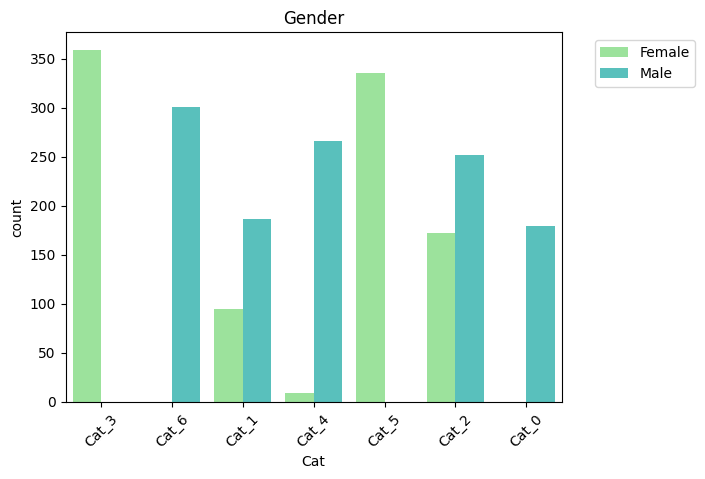

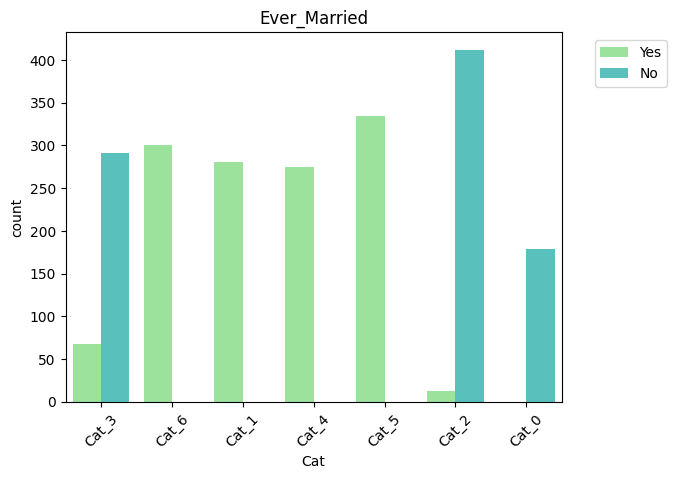

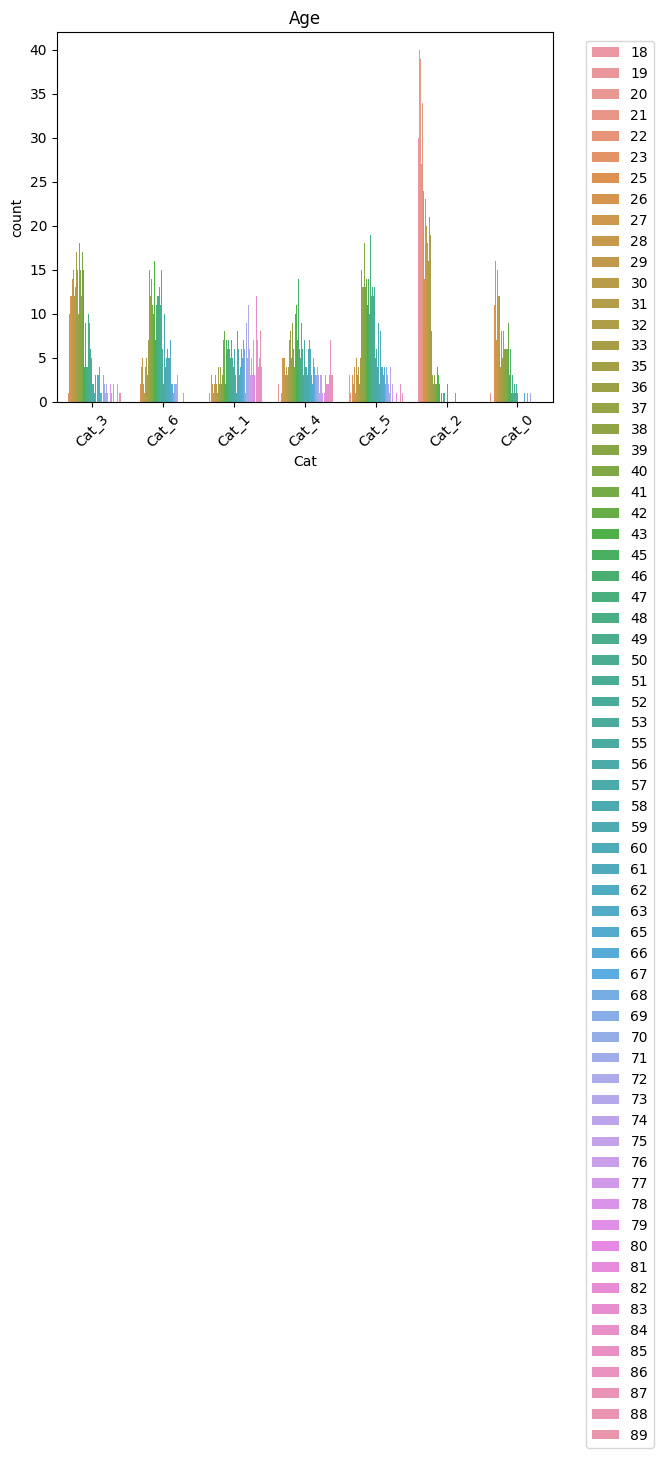

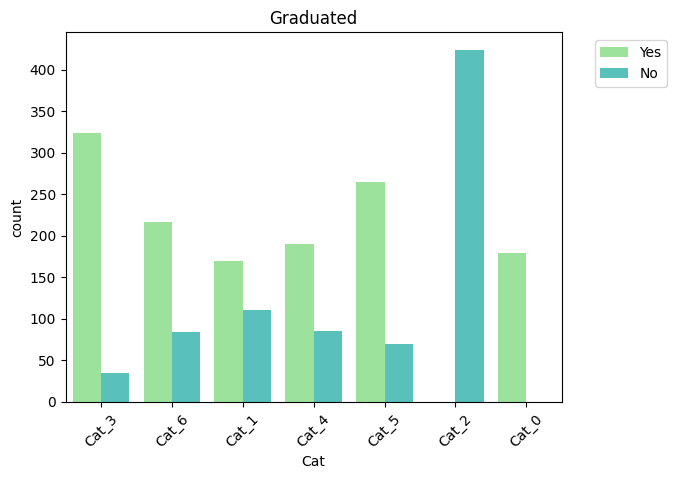

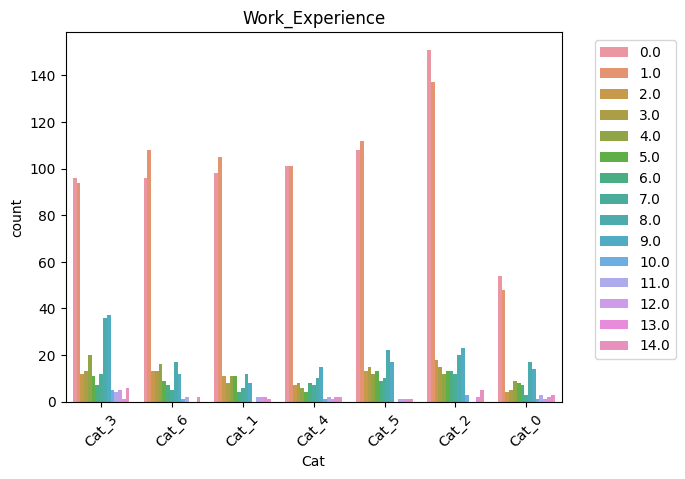

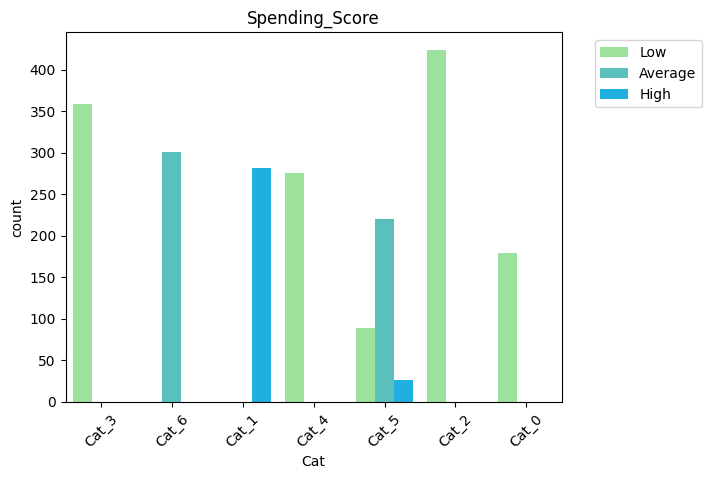

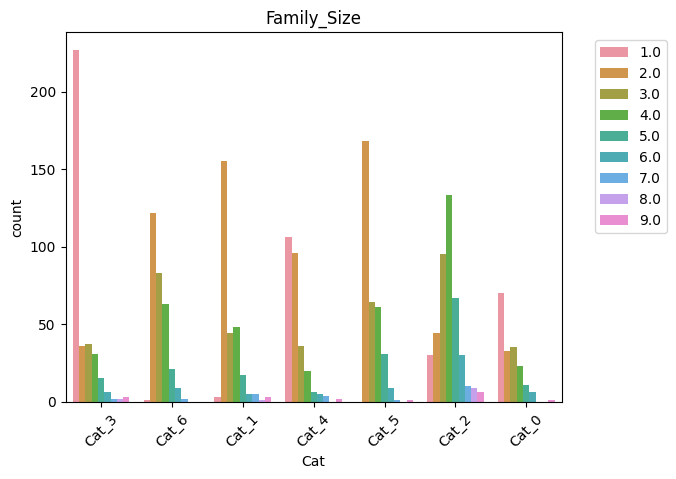

In [26]:
o_columns = ['Gender', 'Ever_Married', 'Age', 'Graduated','Work_Experience', 'Spending_Score', 'Family_Size']
cat = original_df['Cat']

yax = original_df[cat == 'Cat_0']
xax = original_df[o_columns]

for o in o_columns:
    sns.countplot(x=cat, hue=o, data=original_df)
    plt.xticks(rotation=45)
    plt.title(o)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    # moves the legend outside of the graph area
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
    plt.show()


<AxesSubplot: xlabel='Cat', ylabel='count'>

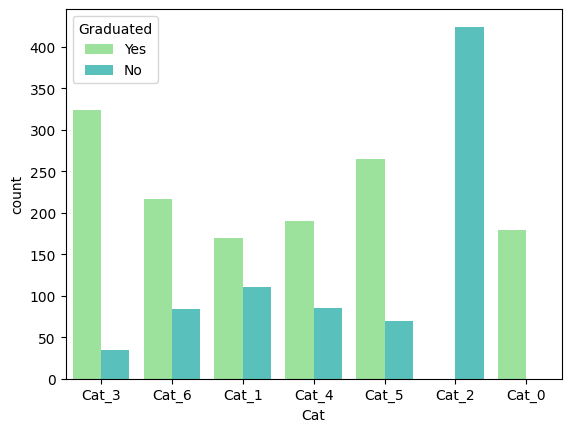

In [17]:
sns.countplot(x=cat, data=original_df, hue=original_df['Graduated'])